/home/pop/.local/lib/python3.8/site-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  warnings.warn(


['BTCUSDT']
----------Training-----------------
binance successfully connected
2021-09-01 2021-09-02
10
tech_indicator_list:  ['macd', 'rsi', 'cci', 'dx']
indicator:  macd
indicator:  rsi
indicator:  cci
indicator:  dx
Succesfully add technical indicators


2022-05-04 11:53:37,398	INFO services.py:1456 -- View the Ray dashboard at http://127.0.0.1:8265
2022-05-04 11:53:47,705	INFO trainer.py:2295 -- Your framework setting is 'tf', meaning you are using static-graph mode. Set framework='tf2' to enable eager execution with tf2.x. You may also then want to set eager_tracing=True in order to reach similar execution speed as with static-graph mode.
2022-05-04 11:53:47,725	INFO trainer.py:864 -- Current log_level is WARN. For more information, set 'log_level': 'INFO' / 'DEBUG' or use the -v and -vv flags.
2022-05-04 11:53:47,786	WARNING rollout_worker.py:498 -- We've added a module for checking environments that are used in experiments. It will cause your environment to fail if your environment is not set upcorrectly. You can disable check env by setting `disable_env_checking` to True in your experiment config dictionary. You can run the environment checking module standalone by calling ray.rllib.utils.check_env(env).
2022-05-04 11:53:47,792	WA

----------End Training-----------------
----------- Testing -----------------
binance successfully connected
2021-09-21 2021-09-30
10
tech_indicator_list:  ['macd', 'rsi', 'cci', 'dx']
indicator:  macd
indicator:  rsi
indicator:  cci
indicator:  dx
Succesfully add technical indicators
price_array:  1998


E0504 12:27:55.262989133    9033 ev_epollex_linux.cc:515]    Error shutting down fd 142. errno: 9
2022-05-04 12:27:59,797	INFO services.py:1456 -- View the Ray dashboard at http://127.0.0.1:8265
(RolloutWorker pid=9273) 2022-05-04 12:28:38,423	WARNING rollout_worker.py:498 -- We've added a module for checking environments that are used in experiments. It will cause your environment to fail if your environment is not set upcorrectly. You can disable check env by setting `disable_env_checking` to True in your experiment config dictionary. You can run the environment checking module standalone by calling ray.rllib.utils.check_env(env).
(RolloutWorker pid=9273) 2022-05-04 12:28:38,423	WARNING env.py:120 -- Your env doesn't have a .spec.max_episode_steps attribute. This is fine if you have set 'horizon' in your config dictionary, or `soft_horizon`. However, if you haven't, 'horizon' will default to infinity, and your environment will not be reset.
(RolloutWorker pid=9274) 2022-05-04 12:28:3

Restoring from checkpoint path ./test_a2c_rllib/checkpoint_000100/checkpoint-100
episode return: 0.9170680197488918
Test Finished!
--------- End Testing ------------------
binance successfully connected
Using cached file ./cache/BTCUSDT_binance_2021-09-21_2021-09-30_5m.pickle
tech_indicator_list:  ['macd', 'rsi', 'cci', 'dx']
indicator:  macd
indicator:  rsi
indicator:  cci
indicator:  dx
Succesfully add technical indicators
binance successfully connected
Using cached file ./cache/BTCUSDT_binance_2021-09-21_2021-09-30_5m.pickle
tech_indicator_list:  ['macd', 'rsi', 'cci', 'dx']
indicator:  macd
indicator:  rsi
indicator:  cci
indicator:  dx
Succesfully add technical indicators


Start date,2021-09-21
End date,2021-09-29
Total months,95
,Backtest
Annual return,-1.086%
Cumulative returns,-8.293%
Annual volatility,4.18%
Sharpe ratio,-0.24
Calmar ratio,-0.11
Stability,0.37
Max drawdown,-9.77%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,9.77,2021-09-24,2021-09-29,NaT,NaN
1,8.34,2021-09-21,2021-09-22,2021-09-24,3
2,0.80,2021-09-24,2021-09-24,2021-09-24,1
3,0.71,2021-09-21,2021-09-21,2021-09-21,1
4,0.68,2021-09-21,2021-09-21,2021-09-21,1


Stress Events,mean,min,max
New Normal,-0.00%,-3.71%,2.78%


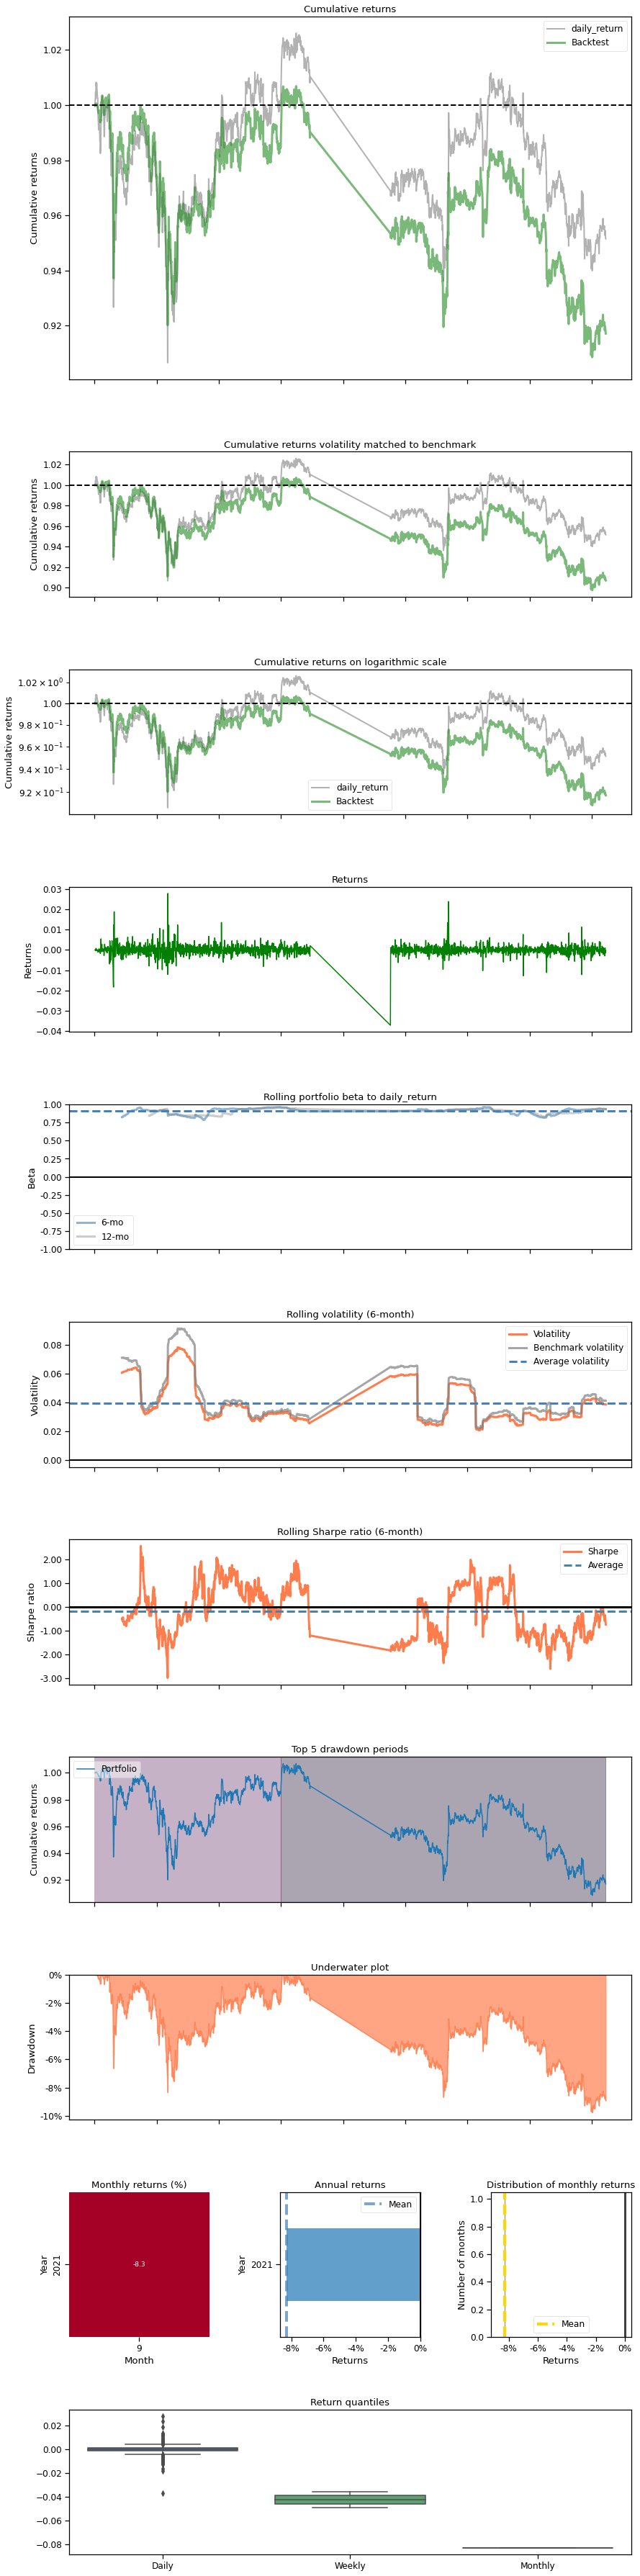

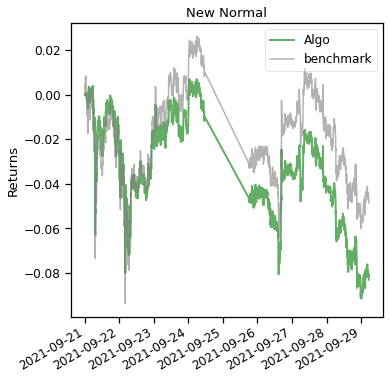

In [ ]:
# script to evaluate the performance of one agent on one crypto
# write a python script instead of the Jupyter Notebook will be easier


#importation of modules
import numpy as np
import math
import gym
from finrl_meta.env_crypto_trading.env_multiple_crypto import CryptoEnv
from finrl.plot import backtest_stats
from finrl import config
from agents.stablebaselines3_models import DRLAgent as DRLAgent_sb3
from agents.rllib_models import DRLAgent as DRLAgent_rllib
from agents.elegantrl_models import DRLAgent as DRLAgent_erl

import pandas as pd
from plot2 import get_baseline, get_daily_return, backtest_plot

from finrl_meta.data_processor import DataProcessor

# ignore pandas warning 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from test import test
from train import train
from cryptoenv import CryptoEnv


TICKER_LIST = ['BTCUSDT','ETHUSDT','ADAUSDT','BNBUSDT','XRPUSDT',
                'SOLUSDT','DOTUSDT', 'DOGEUSDT','AVAXUSDT','UNIUSDT']
TICKER = [TICKER_LIST[0]]
print(TICKER)

TRAIN_START_DATE = '2021-10-01'
TRAIN_END_DATE = '2022-02-26'

TEST_START_DATE = '2022-03-01'
TEST_END_DATE = '2022-04-01'
time_interval = '5m'

env = CryptoEnv


INDICATORS = ['macd', 'rsi', 'cci', 'dx'] #self-defined technical indicator list is NOT supported yet

ERL_PARAMS = {"learning_rate": 2**-15,"batch_size": 2**11,
                "gamma": 0.99, "seed":312,"net_dimension": 2**9, 
                "target_step": 5000, "eval_gap": 30, "eval_times": 1}

RLLIB_PARAMS = {"lr": 2**-15,"train_batch_size": 2**11,
                "gamma": 0.99, "num_workers": 0,
                "horizon": 1e10, 
               "disable_env_checkin": True}


# training of the agent

print('----------Training-----------------')

train(start_date=TRAIN_START_DATE, 
       end_date=TRAIN_END_DATE,
       ticker_list=TICKER,    #only one ticker for the moment (deal with get_baseline for multiple ticker)
       data_source='binance',
       time_interval=time_interval, 
       technical_indicator_list=INDICATORS,
       drl_lib='rllib', 
       env=env, 
       model_name='a2c', 
       cwd='./test_a2c_rllib',
       rllib_params=RLLIB_PARAMS,
       break_step=5e4,
       if_vix=False
       )

print('----------End Training-----------------')

#testing of the agent

print('----------- Testing -----------------')


#with rllib have to check the path sometimes, have to fix it to make it work properly

account_value_erl = test(start_date = TEST_START_DATE, 
                        end_date = TEST_END_DATE,
                        ticker_list = TICKER, 
                        data_source = 'binance',
                        time_interval= time_interval, 
                        technical_indicator_list= INDICATORS,
                        drl_lib='rllib', 
                        env=env, 
                        model_name='a2c', 
                        cwd='./test_a2c_rllib/checkpoint_000100/checkpoint-100', 
                        net_dimension = 2**9, 
                        if_vix=False
                        )

print('--------- End Testing ------------------')


baseline_df = get_baseline(TICKER, TEST_START_DATE, TEST_END_DATE, time_interval)
account_value_erl_pd = pd.DataFrame({'date':baseline_df.date,'account_value':account_value_erl})
assert account_value_erl_pd.shape[0] == baseline_df.shape[0]

backtest_plot(account_value_erl_pd, 
             baseline_ticker = TICKER, 
             baseline_start = TEST_START_DATE,
             baseline_end = TEST_END_DATE)


In [4]:
# script to evaluate the performance of one agent on one crypto
# write a python script instead of the Jupyter Notebook will be easier


#importation of modules
import numpy as np
import math
import gym
from finrl_meta.env_crypto_trading.env_multiple_crypto import CryptoEnv
from finrl.plot import backtest_stats
from finrl import config
from agents.stablebaselines3_models import DRLAgent as DRLAgent_sb3
from agents.rllib_models import DRLAgent as DRLAgent_rllib
from agents.elegantrl_models import DRLAgent as DRLAgent_erl

import pandas as pd
from plot2 import get_baseline, get_daily_return, backtest_plot

from finrl_meta.data_processor import DataProcessor

# ignore pandas warning 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from test import test
from train import train
from cryptoenv import CryptoEnv


TICKER_LIST = ['BTCUSDT','ETHUSDT','ADAUSDT','BNBUSDT','XRPUSDT',
                'SOLUSDT','DOTUSDT', 'DOGEUSDT','AVAXUSDT','UNIUSDT']
TICKER = [TICKER_LIST[0]]
print(TICKER)

TRAIN_START_DATE = '2021-10-01'
TRAIN_END_DATE = '2022-02-26'

TEST_START_DATE = '2022-03-01'
TEST_END_DATE = '2022-04-01'
time_interval = '5m'

env = CryptoEnv


INDICATORS = ['macd', 'rsi', 'cci', 'dx'] #self-defined technical indicator list is NOT supported yet

ERL_PARAMS = {"learning_rate": 2**-15,"batch_size": 2**11,
                "gamma": 0.99, "seed":312,"net_dimension": 2**9, 
                "target_step": 5000, "eval_gap": 30, "eval_times": 1}

RLLIB_PARAMS = {"lr": 2**-15,"train_batch_size": 2**11,
                "gamma": 0.99, "num_workers": 0,
                "horizon": 1e10, 
               "disable_env_checkin": True}

STABLE_PARAMS = {'total_timesteps':1e6,
                    'agent_params': None}

# training of the agent

print('----------Training-----------------')

train(start_date=TRAIN_START_DATE, 
       end_date=TRAIN_END_DATE,
       ticker_list=TICKER,    #only one ticker for the moment (deal with get_baseline for multiple ticker)
       data_source='binance',
       time_interval=time_interval, 
       technical_indicator_list=INDICATORS,
       drl_lib='stable_baselines3', 
       env=env, 
       model_name='ddpg', 
       cwd='./test_ddpg_st',
       total_timesteps=5e4,
       if_vix=False
       )

print('----------End Training-----------------')

#testing of the agent

print('----------- Testing -----------------')


#with rllib have to check the path sometimes, have to fix it to make it work properly

account_value_erl = test(start_date = TEST_START_DATE, 
                        end_date = TEST_END_DATE,
                        ticker_list = TICKER, 
                        data_source = 'binance',
                        time_interval= time_interval, 
                        technical_indicator_list= INDICATORS,
                        drl_lib='stable_baselines3', 
                        env=env, 
                        model_name='ddpg', 
                        cwd='./test_ddpg_st', 
                        net_dimension = 2**9, 
                        if_vix=False
                        )

print('--------- End Testing ------------------')


baseline_df = get_baseline(TICKER, TEST_START_DATE, TEST_END_DATE, time_interval)
account_value_erl_pd = pd.DataFrame({'date':baseline_df.date,'account_value':account_value_erl})
assert account_value_erl_pd.shape[0] == baseline_df.shape[0]

backtest_plot(account_value_erl_pd, 
             baseline_ticker = TICKER, 
             baseline_start = TEST_START_DATE,
             baseline_end = TEST_END_DATE)


['BTCUSDT']
----------Training-----------------
binance successfully connected
2021-10-01 2022-02-26
10
tech_indicator_list:  ['macd', 'rsi', 'cci', 'dx']
indicator:  macd
indicator:  rsi
indicator:  cci
indicator:  dx
Succesfully add technical indicators
{'batch_size': 128, 'buffer_size': 50000, 'learning_rate': 0.001}
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to tensorboard_log/ddpg/ddpg_3


E0504 16:17:30.579469794  265276 backup_poller.cc:134]       Run client channel backup poller: {"created":"@1651655850.579283536","description":"pollset_work","file":"src/core/lib/iomgr/ev_epollex_linux.cc","file_line":320,"referenced_errors":[{"created":"@1651655850.579279264","description":"Bad file descriptor","errno":9,"file":"src/core/lib/iomgr/ev_epollex_linux.cc","file_line":950,"os_error":"Bad file descriptor","syscall":"epoll_wait"}]}
E0504 16:20:25.666320229  268417 backup_poller.cc:134]       Run client channel backup poller: {"created":"@1651656025.666075734","description":"pollset_work","file":"src/core/lib/iomgr/ev_epollex_linux.cc","file_line":320,"referenced_errors":[{"created":"@1651656025.666071932","description":"Bad file descriptor","errno":9,"file":"src/core/lib/iomgr/ev_epollex_linux.cc","file_line":950,"os_error":"Bad file descriptor","syscall":"epoll_wait"}]}
E0504 16:45:36.356189593  295929 backup_poller.cc:134]       Run client channel backup poller: {"created

['BTCUSDT']
----------Training-----------------
----------End Training-----------------
----------- Testing -----------------
binance successfully connected
2022-03-01 2022-04-01
tech_indicator_list:  ['macd', 'rsi', 'cci', 'dx']
indicator:  macd
indicator:  rsi
indicator:  cci
indicator:  dx
Succesfully add technical indicators
price_array:  6701


2022-05-06 10:33:59,842	INFO services.py:1456 -- View the Ray dashboard at http://127.0.0.1:8265
E0506 10:34:00.473342819  471758 ev_epollex_linux.cc:515]    Error shutting down fd 161. errno: 9
(RolloutWorker pid=472010) 2022-05-06 10:34:33,573	WARNING rollout_worker.py:498 -- We've added a module for checking environments that are used in experiments. It will cause your environment to fail if your environment is not set upcorrectly. You can disable check env by setting `disable_env_checking` to True in your experiment config dictionary. You can run the environment checking module standalone by calling ray.rllib.utils.check_env(env).
(RolloutWorker pid=472010) 2022-05-06 10:34:33,573	WARNING env.py:120 -- Your env doesn't have a .spec.max_episode_steps attribute. This is fine if you have set 'horizon' in your config dictionary, or `soft_horizon`. However, if you haven't, 'horizon' will default to infinity, and your environment will not be reset.
(RolloutWorker pid=472015) 2022-05-06 1

Restoring from checkpoint path ./test_ppo_rllib/checkpoint_000100/checkpoint-100
episode return: 1.0
Test Finished!
--------- End Testing ------------------
binance successfully connected
Using cached file ./cache/BTCUSDT_binance_2022-03-01_2022-04-01_5m.pickle
tech_indicator_list:  ['macd', 'rsi', 'cci', 'dx']
indicator:  macd
indicator:  rsi
indicator:  cci
indicator:  dx
Succesfully add technical indicators
binance successfully connected
Using cached file ./cache/BTCUSDT_binance_2022-03-01_2022-04-01_5m.pickle
tech_indicator_list:  ['macd', 'rsi', 'cci', 'dx']
indicator:  macd
indicator:  rsi
indicator:  cci
indicator:  dx
Succesfully add technical indicators


/home/pop/.local/lib/python3.8/site-packages/empyrical/stats.py:710: RuntimeWarning: invalid value encountered in true_divide
  np.divide(
/home/pop/.local/lib/python3.8/site-packages/empyrical/stats.py:799: RuntimeWarning: invalid value encountered in true_divide
  np.divide(average_annual_return, annualized_downside_risk, out=out)
/home/pop/.local/lib/python3.8/site-packages/empyrical/stats.py:1527: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs(np.percentile(returns, 95)) / \


Start date,2022-03-01
End date,2022-03-31
Total months,319
,Backtest
Annual return,0.0%
Cumulative returns,0.0%
Annual volatility,0.0%
Sharpe ratio,NaN
Calmar ratio,NaN
Stability,0.00
Max drawdown,0.0%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,0.00,2022-03-01,2022-03-01,2022-03-01,1
1,NaN,NaT,NaT,NaT,NaN
2,NaN,NaT,NaT,NaT,NaN
3,NaN,NaT,NaT,NaT,NaN
4,NaN,NaT,NaT,NaT,NaN


Stress Events,mean,min,max
New Normal,0.00%,0.00%,0.00%


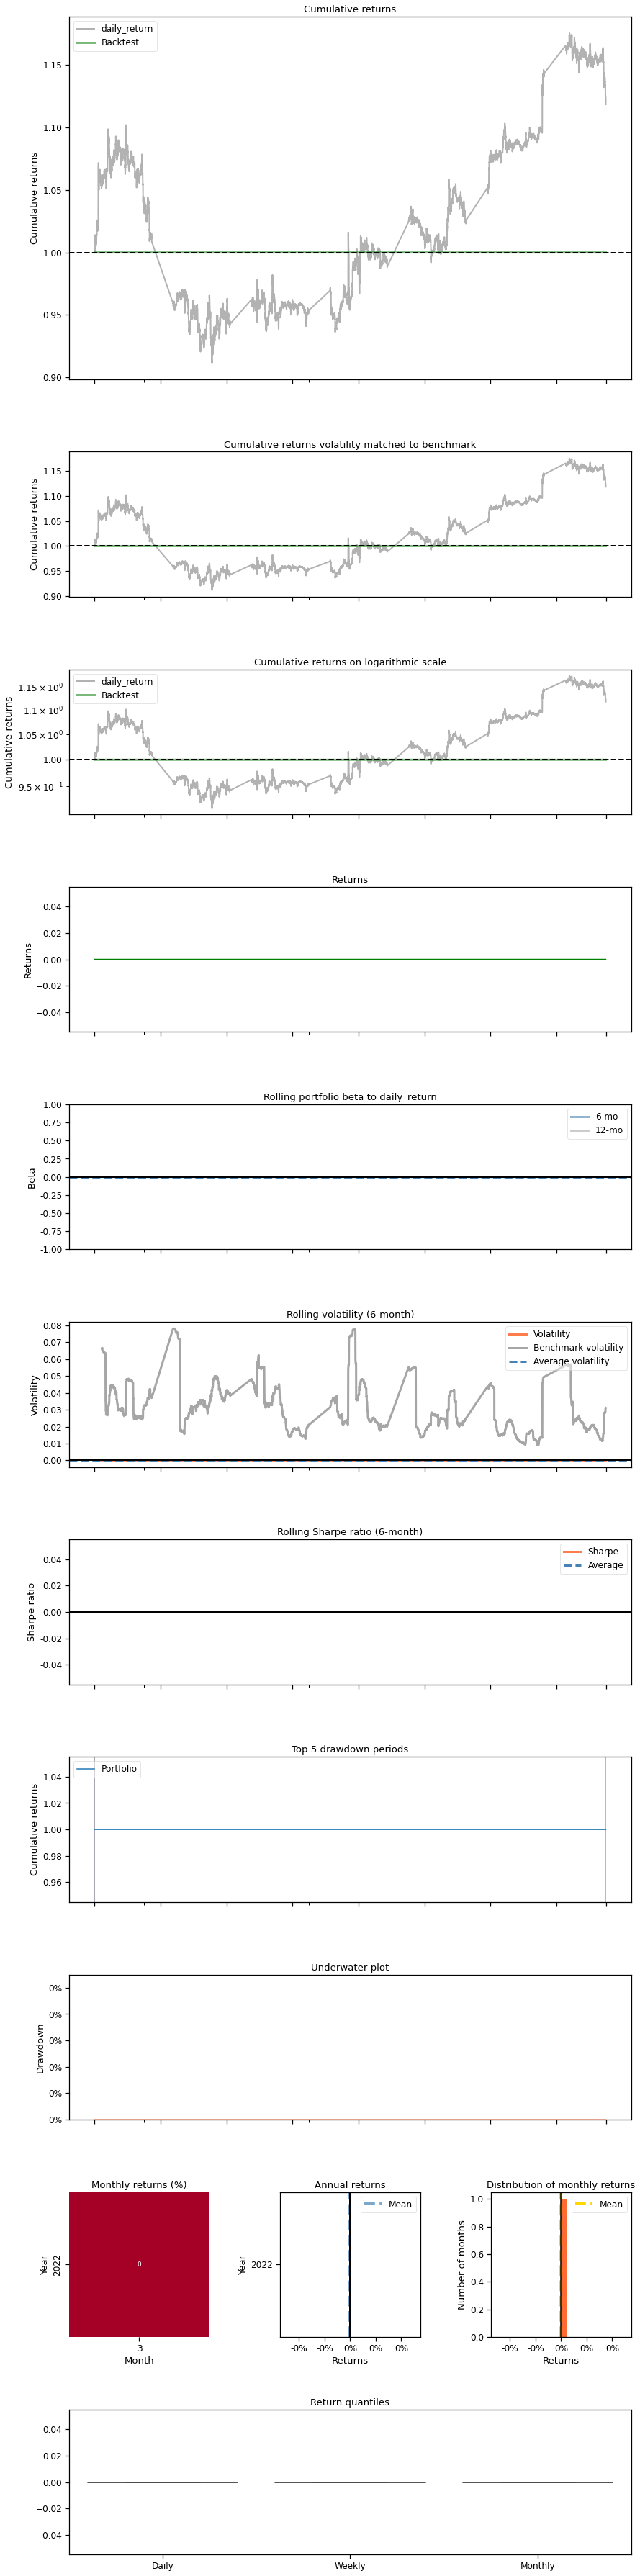

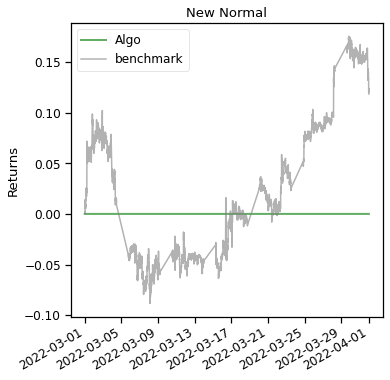

In [6]:
# script to evaluate the performance of one agent on one crypto
# write a python script instead of the Jupyter Notebook will be easier


#importation of modules
import numpy as np
import math
import gym
from finrl_meta.env_crypto_trading.env_multiple_crypto import CryptoEnv
from finrl.plot import backtest_stats
from finrl import config
from agents.stablebaselines3_models import DRLAgent as DRLAgent_sb3
from agents.rllib_models import DRLAgent as DRLAgent_rllib
from agents.elegantrl_models import DRLAgent as DRLAgent_erl
from cryptoenv import CryptoEnv2

import pandas as pd
from plot2 import get_baseline, get_daily_return, backtest_plot

from finrl_meta.data_processor import DataProcessor

# ignore pandas warning 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from test import test
from train import train
from cryptoenv import CryptoEnv2


TICKER_LIST = ['BTCUSDT','ETHUSDT','ADAUSDT','BNBUSDT','XRPUSDT',
                'SOLUSDT','DOTUSDT', 'DOGEUSDT','AVAXUSDT','UNIUSDT']
TICKER = [TICKER_LIST[0]]
print(TICKER)

TRAIN_START_DATE = '2021-10-01'
TRAIN_END_DATE = '2022-02-26'

TEST_START_DATE = '2022-03-01'
TEST_END_DATE = '2022-04-01'
time_interval = '5m'

env = CryptoEnv2


INDICATORS = ['macd', 'rsi', 'cci', 'dx'] #self-defined technical indicator list is NOT supported yet

ERL_PARAMS = {"learning_rate": 2**-15,"batch_size": 2**11,
                "gamma": 0.99, "seed":312,"net_dimension": 2**9, 
                "target_step": 5000, "eval_gap": 30, "eval_times": 1}

RLLIB_PARAMS = {"lr": 2**-15,"train_batch_size": 2**11,
                "gamma": 0.99, "num_workers": 0,
                "horizon": 1e10, 
               "disable_env_checkin": True}


# training of the agent

print('----------Training-----------------')

# train(start_date=TRAIN_START_DATE, 
#        end_date=TRAIN_END_DATE,
#        ticker_list=TICKER,    #only one ticker for the moment (deal with get_baseline for multiple ticker)
#        data_source='binance',
#        time_interval=time_interval, 
#        technical_indicator_list=INDICATORS,
#        drl_lib='rllib', 
#        env=env, 
#        model_name='ppo', 
#        cwd='./test_ppo_rllib',
#        rllib_params=RLLIB_PARAMS,
#        break_step=5e4,
#        if_vix=False
#        )

print('----------End Training-----------------')

#testing of the agent

print('----------- Testing -----------------')


#with rllib have to check the path sometimes, have to fix it to make it work properly

account_value_erl, action_value_erl = test(start_date = TEST_START_DATE, 
                        end_date = TEST_END_DATE,
                        ticker_list = TICKER, 
                        data_source = 'binance',
                        time_interval= time_interval, 
                        technical_indicator_list= INDICATORS,
                        drl_lib='rllib', 
                        env=env, 
                        model_name='ppo', 
                        cwd='./test_ppo_rllib/checkpoint_000100/checkpoint-100', 
                        net_dimension = 2**9, 
                        if_vix=False
                        )

print('--------- End Testing ------------------')


baseline_df = get_baseline(TICKER, TEST_START_DATE, TEST_END_DATE, time_interval)
account_value_erl_pd = pd.DataFrame({'date':baseline_df.date,'account_value':account_value_erl})
assert account_value_erl_pd.shape[0] == baseline_df.shape[0]

backtest_plot(account_value_erl_pd, 
             baseline_ticker = TICKER, 
             baseline_start = TEST_START_DATE,
             baseline_end = TEST_END_DATE)


['BTCUSDT']
----------Training-----------------
binance successfully connected
2021-10-01 2022-02-26
tech_indicator_list:  ['macd', 'rsi', 'cci', 'dx']
indicator:  macd
indicator:  rsi
indicator:  cci
indicator:  dx
Succesfully add technical indicators


E0506 10:40:42.794052119  487927 ev_epollex_linux.cc:515]    Error shutting down fd 180. errno: 9
2022-05-06 10:40:47,196	INFO services.py:1456 -- View the Ray dashboard at http://127.0.0.1:8265
2022-05-06 10:40:56,533	WARNING rollout_worker.py:498 -- We've added a module for checking environments that are used in experiments. It will cause your environment to fail if your environment is not set upcorrectly. You can disable check env by setting `disable_env_checking` to True in your experiment config dictionary. You can run the environment checking module standalone by calling ray.rllib.utils.check_env(env).
2022-05-06 10:40:56,539	WARNING env.py:120 -- Your env doesn't have a .spec.max_episode_steps attribute. This is fine if you have set 'horizon' in your config dictionary, or `soft_horizon`. However, if you haven't, 'horizon' will default to infinity, and your environment will not be reset.
2022-05-06 10:41:08,255	INFO trainable.py:152 -- Trainable.setup took 11.741 seconds. If your

----------End Training-----------------
----------- Testing -----------------
binance successfully connected
2022-03-01 2022-04-01
tech_indicator_list:  ['macd', 'rsi', 'cci', 'dx']
indicator:  macd
indicator:  rsi
indicator:  cci


E0506 11:21:17.044281847  512491 backup_poller.cc:134]       Run client channel backup poller: {"created":"@1651810877.044064441","description":"pollset_work","file":"src/core/lib/iomgr/ev_epollex_linux.cc","file_line":320,"referenced_errors":[{"created":"@1651810877.044052114","description":"Bad file descriptor","errno":9,"file":"src/core/lib/iomgr/ev_epollex_linux.cc","file_line":950,"os_error":"Bad file descriptor","syscall":"epoll_wait"}]}


indicator:  dx
Succesfully add technical indicators
price_array:  6701


2022-05-06 11:21:40,566	INFO services.py:1456 -- View the Ray dashboard at http://127.0.0.1:8265
(RolloutWorker pid=514079) 2022-05-06 11:22:20,334	WARNING rollout_worker.py:498 -- We've added a module for checking environments that are used in experiments. It will cause your environment to fail if your environment is not set upcorrectly. You can disable check env by setting `disable_env_checking` to True in your experiment config dictionary. You can run the environment checking module standalone by calling ray.rllib.utils.check_env(env).
(RolloutWorker pid=514079) 2022-05-06 11:22:20,334	WARNING env.py:120 -- Your env doesn't have a .spec.max_episode_steps attribute. This is fine if you have set 'horizon' in your config dictionary, or `soft_horizon`. However, if you haven't, 'horizon' will default to infinity, and your environment will not be reset.
(RolloutWorker pid=514090) 2022-05-06 11:22:21,430	WARNING rollout_worker.py:498 -- We've added a module for checking environments that a

Restoring from checkpoint path ./test_appo_rllib/checkpoint_000100/checkpoint-100
episode return: 0.8819790686317663
Test Finished!
--------- End Testing ------------------
binance successfully connected
Using cached file ./cache/BTCUSDT_binance_2022-03-01_2022-04-01_5m.pickle
tech_indicator_list:  ['macd', 'rsi', 'cci', 'dx']
indicator:  macd
indicator:  rsi
indicator:  cci
indicator:  dx
Succesfully add technical indicators
binance successfully connected
Using cached file ./cache/BTCUSDT_binance_2022-03-01_2022-04-01_5m.pickle
tech_indicator_list:  ['macd', 'rsi', 'cci', 'dx']
indicator:  macd
indicator:  rsi
indicator:  cci
indicator:  dx
Succesfully add technical indicators


Start date,2022-03-01
End date,2022-03-31
Total months,319
,Backtest
Annual return,-0.471%
Cumulative returns,-11.802%
Annual volatility,2.94%
Sharpe ratio,-0.15
Calmar ratio,-0.03
Stability,0.27
Max drawdown,-18.168%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,18.17,2022-03-01,2022-03-15,NaT,NaN
1,1.72,2022-03-01,2022-03-01,2022-03-01,1
2,0.64,2022-03-01,2022-03-01,2022-03-01,1
3,0.22,2022-03-01,2022-03-01,2022-03-01,1
4,0.12,2022-03-01,2022-03-01,2022-03-01,1


Exception in thread Thread-6542:
Traceback (most recent call last):
  File "/usr/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/home/pop/.local/lib/python3.8/site-packages/ray/rllib/execution/learner_thread.py", line 74, in run
    self.step()
  File "/home/pop/.local/lib/python3.8/site-packages/ray/rllib/execution/multi_gpu_learner_thread.py", line 143, in step
    buffer_idx, released = self.ready_tower_stacks_buffer.get()
  File "/home/pop/.local/lib/python3.8/site-packages/ray/rllib/execution/buffers/minibatch_buffer.py", line 48, in get
    self.buffers[self.idx] = self.inqueue.get(timeout=self.timeout)
  File "/usr/lib/python3.8/queue.py", line 178, in get
    raise Empty
_queue.Empty
E0506 11:26:53.564640414  526094 backup_poller.cc:134]       Run client channel backup poller: {"created":"@1651811213.563762268","description":"pollset_work","file":"src/core/lib/iomgr/ev_epollex_linux.cc","file_line":320,"referenced_errors":[{"created":"@1651811

Stress Events,mean,min,max
New Normal,-0.00%,-3.44%,3.52%


Exception in thread Thread-7065:
Traceback (most recent call last):
  File "/usr/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/home/pop/.local/lib/python3.8/site-packages/ray/rllib/execution/learner_thread.py", line 74, in run
    self.step()
  File "/home/pop/.local/lib/python3.8/site-packages/ray/rllib/execution/multi_gpu_learner_thread.py", line 143, in step
    buffer_idx, released = self.ready_tower_stacks_buffer.get()
  File "/home/pop/.local/lib/python3.8/site-packages/ray/rllib/execution/buffers/minibatch_buffer.py", line 48, in get
    self.buffers[self.idx] = self.inqueue.get(timeout=self.timeout)
  File "/usr/lib/python3.8/queue.py", line 178, in get
    raise Empty
_queue.Empty


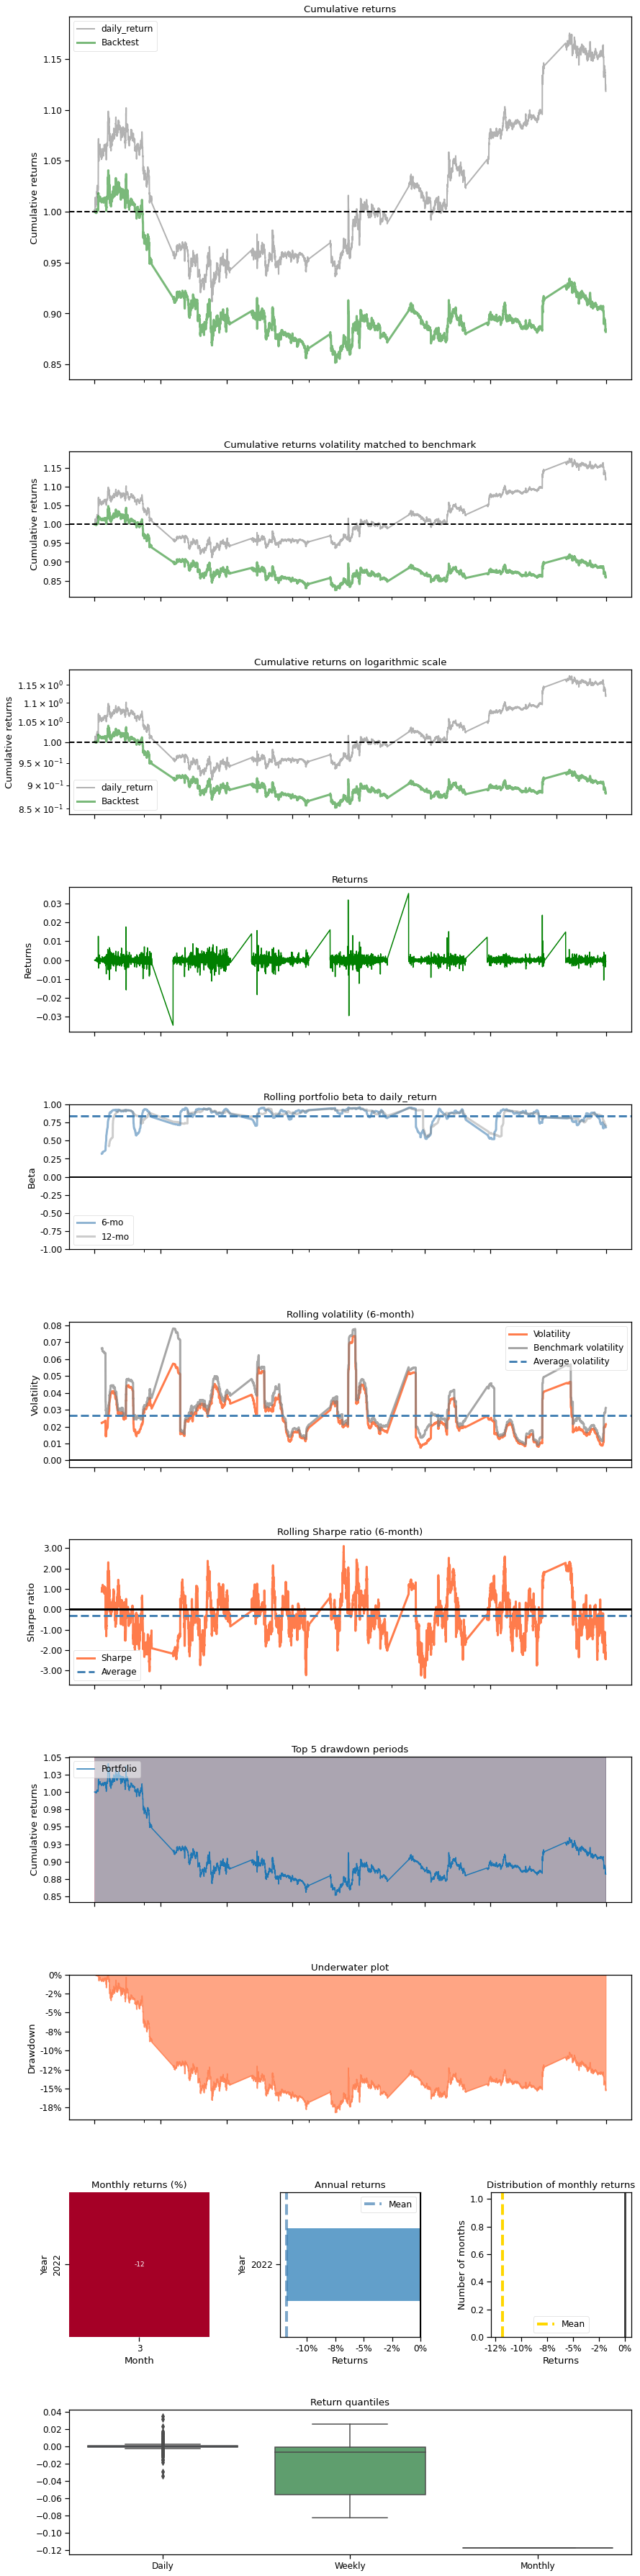

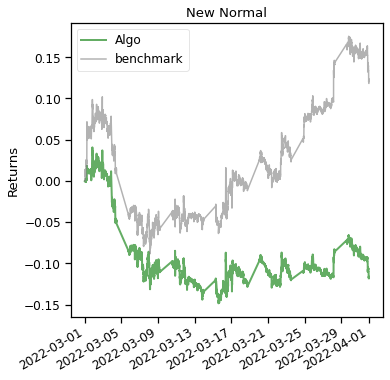

E0506 11:38:09.292941383  578816 backup_poller.cc:134]       Run client channel backup poller: {"created":"@1651811889.292772212","description":"pollset_work","file":"src/core/lib/iomgr/ev_epollex_linux.cc","file_line":320,"referenced_errors":[{"created":"@1651811889.292764177","description":"Bad file descriptor","errno":9,"file":"src/core/lib/iomgr/ev_epollex_linux.cc","file_line":950,"os_error":"Bad file descriptor","syscall":"epoll_wait"}]}
E0506 11:45:34.476554985  614319 backup_poller.cc:134]       Run client channel backup poller: {"created":"@1651812334.476413471","description":"pollset_work","file":"src/core/lib/iomgr/ev_epollex_linux.cc","file_line":320,"referenced_errors":[{"created":"@1651812334.476405917","description":"Bad file descriptor","errno":9,"file":"src/core/lib/iomgr/ev_epollex_linux.cc","file_line":950,"os_error":"Bad file descriptor","syscall":"epoll_wait"}]}
E0506 11:45:54.519170346  615861 backup_poller.cc:134]       Run client channel backup poller: {"created

In [7]:
# script to evaluate the performance of one agent on one crypto
# write a python script instead of the Jupyter Notebook will be easier


#importation of modules
import numpy as np
import math
import gym
from finrl_meta.env_crypto_trading.env_multiple_crypto import CryptoEnv
from finrl.plot import backtest_stats
from finrl import config
from agents.stablebaselines3_models import DRLAgent as DRLAgent_sb3
from agents.rllib_models import DRLAgent as DRLAgent_rllib
from agents.elegantrl_models import DRLAgent as DRLAgent_erl
from cryptoenv import CryptoEnv2

import pandas as pd
from plot2 import get_baseline, get_daily_return, backtest_plot

from finrl_meta.data_processor import DataProcessor

# ignore pandas warning 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from test import test
from train import train
from cryptoenv import CryptoEnv2


TICKER_LIST = ['BTCUSDT','ETHUSDT','ADAUSDT','BNBUSDT','XRPUSDT',
                'SOLUSDT','DOTUSDT', 'DOGEUSDT','AVAXUSDT','UNIUSDT']
TICKER = [TICKER_LIST[0]]
print(TICKER)

TRAIN_START_DATE = '2021-10-01'
TRAIN_END_DATE = '2022-02-26'

TEST_START_DATE = '2022-03-01'
TEST_END_DATE = '2022-04-01'
time_interval = '5m'

env = CryptoEnv2


INDICATORS = ['macd', 'rsi', 'cci', 'dx'] #self-defined technical indicator list is NOT supported yet

ERL_PARAMS = {"learning_rate": 2**-15,"batch_size": 2**11,
                "gamma": 0.99, "seed":312,"net_dimension": 2**9, 
                "target_step": 5000, "eval_gap": 30, "eval_times": 1}

RLLIB_PARAMS = {"lr": 2**-15,"train_batch_size": 2**11,
                "gamma": 0.99, "num_workers": 0,
                "horizon": 1e10, 
               "disable_env_checkin": True}


# training of the agent

print('----------Training-----------------')

train(start_date=TRAIN_START_DATE, 
       end_date=TRAIN_END_DATE,
       ticker_list=TICKER,    #only one ticker for the moment (deal with get_baseline for multiple ticker)
       data_source='binance',
       time_interval=time_interval, 
       technical_indicator_list=INDICATORS,
       drl_lib='rllib', 
       env=env, 
       model_name='appo', 
       cwd='./test_appo_rllib',
       rllib_params=RLLIB_PARAMS,
       break_step=5e4,
       if_vix=False
       )

print('----------End Training-----------------')

#testing of the agent

print('----------- Testing -----------------')


#with rllib have to check the path sometimes, have to fix it to make it work properly

account_value_erl, action_value_erl = test(start_date = TEST_START_DATE, 
                        end_date = TEST_END_DATE,
                        ticker_list = TICKER, 
                        data_source = 'binance',
                        time_interval= time_interval, 
                        technical_indicator_list= INDICATORS,
                        drl_lib='rllib', 
                        env=env, 
                        model_name='appo', 
                        cwd='./test_appo_rllib/checkpoint_000100/checkpoint-100', 
                        net_dimension = 2**9, 
                        if_vix=False
                        )

print('--------- End Testing ------------------')


baseline_df = get_baseline(TICKER, TEST_START_DATE, TEST_END_DATE, time_interval)
account_value_erl_pd = pd.DataFrame({'date':baseline_df.date,'account_value':account_value_erl})
assert account_value_erl_pd.shape[0] == baseline_df.shape[0]

backtest_plot(account_value_erl_pd, 
             baseline_ticker = TICKER, 
             baseline_start = TEST_START_DATE,
             baseline_end = TEST_END_DATE)
